In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import scipy
import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils
import copy
import glob

In [3]:
source_dir = '../sourcedata/BIDS_HISTO/'
hippunfold_dir = '../hippunfold/HISTO_v1.3.0_100um/hippunfold/'

subs = ['bbhist', 'bbhist', 'pli3d', '122017', '122017', '152017', '152017']
ses = ''
hemis = ['L','R','L','R','L','L','R','L','R']
labels = 'hipp'
den='unfoldiso'

features = ['thickness', 'gyrification', 'curvature']
morph_dat_hist = np.zeros([126*254,len(subs),len(features)])*np.nan
d=[]
for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        d = nib.load(f'{hippunfold_dir}/sub-{sub}/surf/sub-{sub}_hemi-{hemis[s]}_space-corobl'\
                     f'_den-{den}_label-{labels}_{feature}.shape.gii')
        morph_dat_hist[:,s,f] = d.darrays[0].data
        if feature=='curvature':
            morph_dat_hist[:,s,f] = np.tanh(morph_dat_hist[:,s,f])
            if hemis[s]=="R":
                morph_dat_hist[:,s,f] = -morph_dat_hist[:,s,f]

/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


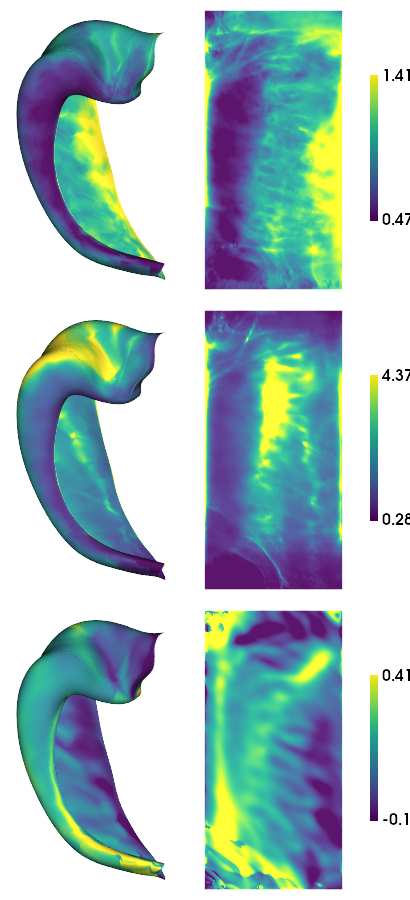

In [4]:
plotting.surfplot_canonical_foldunfold(np.mean(morph_dat_hist,axis=1), labels=labels, hemis=['L'], unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

In [5]:
## micapipe_dir = '../sourcedata/Supersession_PNI'
hippunfold_dir = '../hippunfold/PNI_v1.3.0_super/hippunfold'

subs = ['PNC002', 'PNC003', 'PNC006', 'PNC007', 'PNC009', 'PNC010', 'PNC015', 'PNC016', 'PNC018', 'PNC019']
ses = ''
hemis = ['L','R']
labels = ['hipp','dentate'] 
den = '0p5mm'
ind = [range(7262), range(7262,7262+1788)]

morph_dat_MRI7T = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan
d=[]
for h,hemi in enumerate(hemis):
    for l,label in enumerate(labels):
        for f,feature in enumerate(features):
            for s,sub in enumerate(subs):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/surf/sub-{sub}_hemi-{hemi}_space-T1w'\
                                 f'_den-{den}_label-{label}_{feature}.shape.gii')
                    morph_dat_MRI7T[ind[l],h,s,f] = d.darrays[0].data
                except:
                    print(f'{sub} {feature} {label} not found')
morph_dat_MRI7T[:,0,:,2] = -morph_dat_MRI7T[:,0,:,2]

PNC002 thickness dentate not found
PNC003 thickness dentate not found
PNC006 thickness dentate not found
PNC007 thickness dentate not found
PNC009 thickness dentate not found
PNC010 thickness dentate not found
PNC015 thickness dentate not found
PNC016 thickness dentate not found
PNC018 thickness dentate not found
PNC019 thickness dentate not found
PNC002 curvature dentate not found
PNC003 curvature dentate not found
PNC006 curvature dentate not found
PNC007 curvature dentate not found
PNC009 curvature dentate not found
PNC010 curvature dentate not found
PNC015 curvature dentate not found
PNC016 curvature dentate not found
PNC018 curvature dentate not found
PNC019 curvature dentate not found
PNC002 thickness dentate not found
PNC003 thickness dentate not found
PNC006 thickness dentate not found
PNC007 thickness dentate not found
PNC009 thickness dentate not found
PNC010 thickness dentate not found
PNC015 thickness dentate not found
PNC016 thickness dentate not found
PNC018 thickness den

/data/mica1/01_programs/tmp/ipykernel_27154/2706198892.py:1: RuntimeWarning: Mean of empty slice
  plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI7T,axis=2), hemis=hemis, labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)


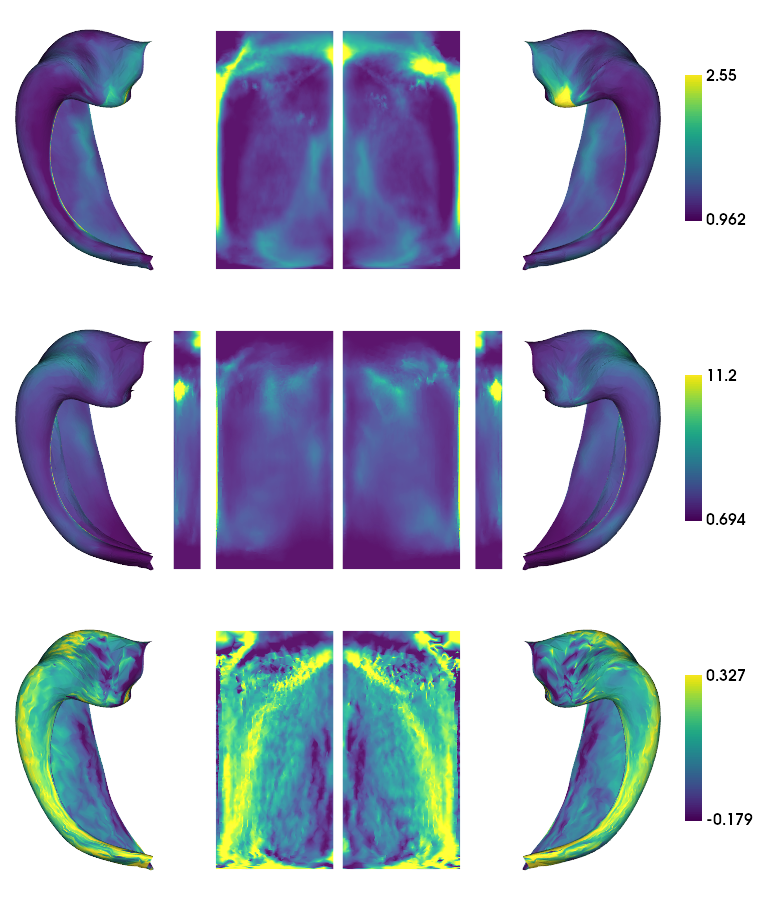

In [6]:
plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI7T,axis=2), hemis=hemis, labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

In [7]:
micapipe_dir = '../sourcedata/Micapipe_MICs'
hippunfold_dir = '../hippunfold/MICs_v1.3.0/hippunfold'

subs = ['HC048', 'HC043', 'HC087', 'HC037', 'HC055', 'HC100', 'HC036', 'HC017', 'HC088', 'HC040', 'HC058', 'HC076', 'HC090', 'HC059', 'HC101', 'HC063', 'HC094', 'HC024', 'HC050',
 'HC080', 'HC013', 'HC026', 'HC001', 'HC084', 'HC105', 'HC083', 'HC042', 'HC014', 'HC033', 'HC081', 'HC106', 'HC108', 'HC095', 'HC002', 'HC102', 'HC028', 'HC020', 'HC049',
 'HC007', 'HC023', 'HC065', 'HC025', 'HC056', 'HC003', 'HC015', 'HC077', 'HC067', 'HC072', 'HC109', 'HC086', 'HC089', 'HC091', 'HC031', 'HC039', 'HC112', 'HC068', 'HC034',
 'HC032', 'HC060', 'HC047', 'HC103', 'HC046', 'HC009', 'HC097', 'HC116', 'HC053', 'HC079', 'HC029', 'HC075', 'HC078', 'HC057', 'HC018', 'HC074', 'HC064',
 'HC096', 'HC010', 'HC038', 'HC093', 'HC082', 'HC092', 'HC027', 'HC019', 'HC005', 'HC008', 'HC011', 'HC044', 'HC030', 'HC035', 'HC085', 'HC069', 'HC041', 'HC012', 'HC054', 'HC022', 'HC016', 'HC099',
 'HC073', 'HC052', 'HC045']
ses = 'ses-01'
hemis = ['L','R']
labels = ['hipp','dentate'] 
den = '0p5mm'
ind = [range(7262), range(7262,7262+1788)]

morph_dat_MRI3T = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan
d=[]
for h,hemi in enumerate(hemis):
    for l,label in enumerate(labels):
        for f,feature in enumerate(features):
            for s,sub in enumerate(subs):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/{ses}/surf/sub-{sub}_{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-{den}_label-{label}_{feature}.shape.gii')
                    morph_dat_MRI3T[ind[l],h,s,f] = d.darrays[0].data
                except:
                    print(f'{sub} {feature} {label} not found')
morph_dat_MRI3T[:,0,:,2] = -morph_dat_MRI3T[:,0,:,2]

HC048 thickness dentate not found
HC043 thickness dentate not found
HC087 thickness dentate not found
HC037 thickness dentate not found
HC055 thickness dentate not found
HC100 thickness dentate not found
HC036 thickness dentate not found
HC017 thickness dentate not found
HC088 thickness dentate not found
HC040 thickness dentate not found
HC058 thickness dentate not found
HC076 thickness dentate not found
HC090 thickness dentate not found
HC059 thickness dentate not found
HC101 thickness dentate not found
HC063 thickness dentate not found
HC094 thickness dentate not found
HC024 thickness dentate not found
HC050 thickness dentate not found
HC080 thickness dentate not found
HC013 thickness dentate not found
HC026 thickness dentate not found
HC001 thickness dentate not found
HC084 thickness dentate not found
HC105 thickness dentate not found
HC083 thickness dentate not found
HC042 thickness dentate not found
HC014 thickness dentate not found
HC033 thickness dentate not found
HC081 thicknes

/data/mica1/01_programs/tmp/ipykernel_27154/669572281.py:1: RuntimeWarning: Mean of empty slice
  plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI3T,axis=2), hemis=hemis, labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)


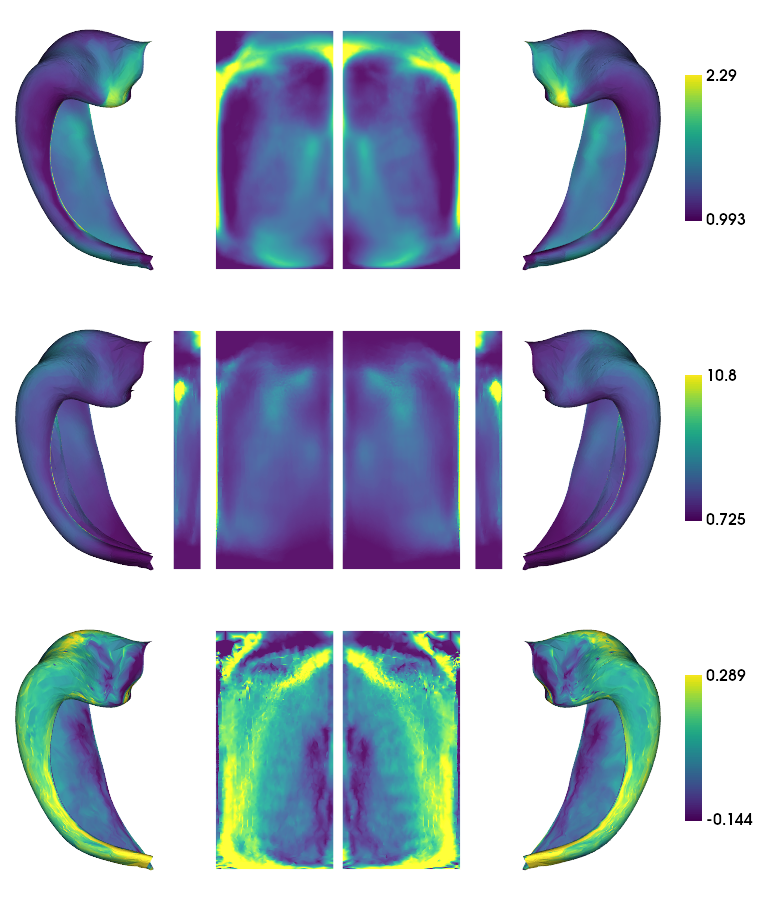

In [8]:
plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI3T,axis=2), hemis=hemis, labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

In [9]:
# save 2D map
for f,feature in enumerate(features):
    for h,hemi in enumerate(hemis):
        cdat = np.nanmean(morph_dat_MRI3T[ind[0],h,:,f],axis=1).flatten()
        data_array = nib.gifti.GiftiDataArray(data=cdat)
        image = nib.gifti.GiftiImage()
        image.add_gifti_data_array(data_array)
        nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-{feature}_average-99_hemi-{hemi}_den-0p5mm_label-hipp.shape.gii')

In [10]:
# save 2D map
for f,feature in enumerate(features):
    cdat = np.nanmean(morph_dat_MRI7T[ind[0],:,:,f],axis=(1,2)).flatten()
    data_array = nib.gifti.GiftiDataArray(data=cdat)
    image = nib.gifti.GiftiImage()
    image.add_gifti_data_array(data_array)
    nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-{feature}_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii')

In [11]:
for f,feature in enumerate(features):
    cdat = np.nanmean(morph_dat_hist[:,:,f],axis=1).flatten()
    data_array = nib.gifti.GiftiDataArray(data=cdat)
    image = nib.gifti.GiftiImage()
    image.add_gifti_data_array(data_array)
    nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-Mixed/histology-{feature}_average-7_hemi-mix_den-unfoldiso_label-hipp.shape.gii')